# <font color=#cc0012>Prosper</font>

Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than $14 billion in loans to more than 870,000 people.

Borrowers apply online for a fixed-rate, fixed-term loan between \$2000 and \$40000. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors.

> Loan Purpose — I stick to the categories Debt Consolidation, Home Improvement, Personal, Auto and Other. Some of the categories were recently created or are historically (and via stats) poor-performing investments.

>Income — I currently start filtering out the \$0, Not Employed and Not Available. However, from my research, anyone sub\$50,000 annually is more at risk to default.


> Loan Term — I prefer to invest only in 36-month loans or shorter. While 60-month notes are available and show a slight increase in returns, I prefer to avoid longer-term loans.


>Inquiries — How many times in the past six months has the borrower requested credit checks? I select 0 to 1 requests. Statistically, anyone who’s requested more than one has a much great risk to default.


>Prosper Rating — I select B notes or lower, mainly because I want a higher return and will accept the slightly higher default risk. You might want to adjust this accordingly.

>Credit History — Individuals with a credit history of more than six years have shown to be a better risk. It’s assumed they know how to better manage their money and also have been able to somewhat get themselves on their feet.

>Public Records — None. I don’t want individuals who have defaulted on previous loans. This is especially true since Prosper loans are unsecured debt. As an investor, I have only their word they will keep paying the loan.

>Debt to Income Ratio — Less than 40 percent has been shown to less likely default. In addition, Prosper rejects members who have ratios higher than 50 percent, so this must be an important metric.

>Previous Prosper Loans — While I don’t exclude new Proper borrowers, Prosper members who’ve shown to make timely payments are statistically a much better credit risk.

In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("prosper-loan-data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
keys = ["ListingKey","ListingCreationDate","LoanOriginationDate","DateCreditPulled","ProsperRating (Alpha)","Term","ListingCategory (numeric)","LoanOriginalAmount","BorrowerAPR","EstimatedReturn","LoanStatus","StatedMonthlyIncome","IsBorrowerHomeowner","ProsperPrincipalBorrowed","ProsperPrincipalOutstanding"]

In [6]:
df[keys].head()

,ListingKey,ListingCreationDate,LoanOriginationDate,DateCreditPulled,ProsperRating (Alpha),Term,ListingCategory (numeric),LoanOriginalAmount,BorrowerAPR,EstimatedReturn,LoanStatus,StatedMonthlyIncome,IsBorrowerHomeowner,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,2007-09-12 00:00:00,2007-08-26 18:41:46.780000000,NaN,36,0,9425,0.16516,NaN,Completed,3083.333333,True,NaN,NaN
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,2014-03-03 00:00:00,2014-02-27 08:28:14,A,36,2,10000,0.12016,0.05470,Current,6125.000000,False,NaN,NaN
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,2007-01-17 00:00:00,2007-01-02 14:09:10.060000000,NaN,36,0,3001,0.28269,NaN,Completed,2083.333333,False,NaN,NaN
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,2012-11-01 00:00:00,2012-10-22 11:02:32,A,36,16,10000,0.12528,0.06000,Current,2875.000000,True,NaN,NaN
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,2013-09-20 00:00:00,2013-09-14 18:38:44,D,36,2,15000,0.24614,0.09066,Current,9583.333333,True,11000.0,9947.9


In [7]:
loans = df[keys]

In [8]:
loans.rename(columns={'ProsperRating (Alpha)': 'ProsperRating',"ListingCategory (numeric)":"ListingCategory"},inplace = True)

C:\Users\Jovan\Anaconda3\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


## <font color=#b30069> Assessment </font>

In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingKey                     113937 non-null object
ListingCreationDate            113937 non-null object
LoanOriginationDate            113937 non-null object
DateCreditPulled               113937 non-null object
ProsperRating                  84853 non-null object
Term                           113937 non-null int64
ListingCategory                113937 non-null int64
LoanOriginalAmount             113937 non-null int64
BorrowerAPR                    113912 non-null float64
EstimatedReturn                84853 non-null float64
LoanStatus                     113937 non-null object
StatedMonthlyIncome            113937 non-null float64
IsBorrowerHomeowner            113937 non-null bool
ProsperPrincipalBorrowed       22085 non-null float64
ProsperPrincipalOutstanding    22085 non-null float64
dtypes: bool(1), float64(5), int64(3), object(6)
memory usage: 9.7+ MB


In [10]:
loans.describe()

,Term,ListingCategory,LoanOriginalAmount,BorrowerAPR,EstimatedReturn,StatedMonthlyIncome,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding
count,113937.000000,113937.000000,113937.00000,113912.000000,84853.000000,1.139370e+05,22085.000000,22085.000000
mean,40.830248,2.774209,8337.01385,0.218828,0.096068,5.608026e+03,8472.311961,2930.313906
std,10.436212,3.996797,6245.80058,0.080364,0.030403,7.478497e+03,7395.507650,3806.635075
min,12.000000,0.000000,1000.00000,0.006530,-0.182700,0.000000e+00,0.000000,0.000000
25%,36.000000,1.000000,4000.00000,0.156290,0.074080,3.200333e+03,3500.000000,0.000000
50%,36.000000,1.000000,6500.00000,0.209760,0.091700,4.666667e+03,6000.000000,1626.550000
75%,36.000000,3.000000,12000.00000,0.283810,0.116600,6.825000e+03,11000.000000,4126.720000
max,60.000000,20.000000,35000.00000,0.512290,0.283700,1.750003e+06,72499.000000,23450.950000


In [11]:
loans[(loans["ProsperRating"].isnull()) & (loans["ProsperPrincipalBorrowed"].notnull())]

,ListingKey,ListingCreationDate,LoanOriginationDate,DateCreditPulled,ProsperRating,Term,ListingCategory,LoanOriginalAmount,BorrowerAPR,EstimatedReturn,LoanStatus,StatedMonthlyIncome,IsBorrowerHomeowner,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding
46,0F8B34281015537050D4FEC,2008-08-05 19:42:49.197000000,2008-08-15 00:00:00,2008-08-05 19:36:35.233000000,NaN,36,1,4000,0.17170,NaN,Completed,3166.666667,False,6000.0,4317.11
78,0DFE3425061927556BB8A75,2008-06-29 23:23:40.157000000,2008-07-08 00:00:00,2008-06-29 23:13:04.860000000,NaN,36,3,4800,0.18454,NaN,Chargedoff,0.000000,True,7750.0,6725.84
101,0F6A3407615179140F880BF,2007-12-23 12:09:24,2008-01-08 00:00:00,2007-12-23 11:58:02.563000000,NaN,36,1,2932,0.20421,NaN,Chargedoff,7416.666667,True,25000.0,21862.26
127,10F83416199324455232962,2008-03-13 12:04:51.623000000,2008-03-21 00:00:00,2008-03-11 11:47:42.457000000,NaN,36,1,2551,0.29743,NaN,Chargedoff,2946.666667,False,5550.0,2331.40
150,10683423770994576084943,2008-06-12 11:59:55.217000000,2010-05-19 00:00:00,2010-05-07 09:12:07,NaN,36,7,6500,0.08641,NaN,Completed,5833.333333,True,17500.0,0.02
201,10E533983959116999E3768,2007-08-30 20:56:07.907000000,2007-09-13 00:00:00,2007-08-19 08:47:21.187000000,NaN,36,0,20000,0.15713,NaN,Completed,6666.666667,False,10000.0,0.00
241,2EBC3426392173872AC3827,2008-07-06 11:49:51.040000000,2008-07-08 00:00:00,2008-07-06 11:28:34.030000000,NaN,36,7,1100,0.37453,NaN,Completed,2702.916667,False,1000.0,555.68
421,31773411053375955CA3F3E,2008-01-18 15:07:50.917000000,2008-02-04 00:00:00,2008-01-10 13:00:54.947000000,NaN,36,4,1000,0.24264,NaN,Completed,5865.000000,False,3000.0,2514.71
443,09B334070789257072E536C,2007-11-29 16:15:27.480000000,2007-12-12 00:00:00,2007-11-29 16:01:10.660000000,NaN,36,0,3750,0.10190,NaN,Completed,2166.666667,False,2550.0,1724.48
521,321E340424193323634BB93,2007-11-14 19:33:38.060000000,2007-11-21 00:00:00,2007-11-14 19:26:23.147000000,NaN,36,0,5000,0.17420,NaN,Completed,30166.666667,True,25000.0,19746.79


In [12]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

### <font color=#ff0096>Quality issues</font>
- ListingCreationDate, LoanCreationDate and CreditLinePulled to datetime objects

## <font color=#b30069> Cleaning </font>

**Define**

Truncate long strings and convert to datetie using strptime

**Code**

In [13]:
loans2 = loans.copy()

In [14]:
loans2["ListingCreationDate"].head()

0    2007-08-26 19:09:29.263000000
1    2014-02-27 08:28:07.900000000
2    2007-01-05 15:00:47.090000000
3    2012-10-22 11:02:35.010000000
4    2013-09-14 18:38:39.097000000
Name: ListingCreationDate, dtype: object

In [15]:
def truncate_extra(row):
    if len(row.ListingCreationDate)==29:
        return row.ListingCreationDate[:-10]
    else:
        return row.ListingCreationDate

In [16]:
#Since this is empty, we have successfully truncated our strings
loans2.ListingCreationDate = loans2.apply(truncate_extra,axis=1)
loans2[loans2.ListingCreationDate.str.len()!=19]

,ListingKey,ListingCreationDate,LoanOriginationDate,DateCreditPulled,ProsperRating,Term,ListingCategory,LoanOriginalAmount,BorrowerAPR,EstimatedReturn,LoanStatus,StatedMonthlyIncome,IsBorrowerHomeowner,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding


In [17]:
loans2[loans2.ListingCreationDate.str.len()!=19]['ListingCreationDate']
loans2.ListingCreationDate = loans2.ListingCreationDate.apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

**Define**

Boolean index columns after July 2009 and store in post_july.

**Code**

In [18]:
post_july = loans2[loans2.ListingCreationDate.dt.date>datetime.date(2009, 7, 31)]
post_july.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84672 entries, 1 to 113936
Data columns (total 15 columns):
ListingKey                     84672 non-null object
ListingCreationDate            84672 non-null datetime64[ns]
LoanOriginationDate            84672 non-null object
DateCreditPulled               84672 non-null object
ProsperRating                  84672 non-null object
Term                           84672 non-null int64
ListingCategory                84672 non-null int64
LoanOriginalAmount             84672 non-null int64
BorrowerAPR                    84672 non-null float64
EstimatedReturn                84672 non-null float64
LoanStatus                     84672 non-null object
StatedMonthlyIncome            84672 non-null float64
IsBorrowerHomeowner            84672 non-null bool
ProsperPrincipalBorrowed       19682 non-null float64
ProsperPrincipalOutstanding    19682 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(5), int64(3), object(5)
memory usage: 8.2+ 

## <font color=#b30069> Exploratory Analysis </font>

### <font color=#ff0096>Univariate Exploration</font>

C:\Users\Jovan\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


<Container object of 7 artists>

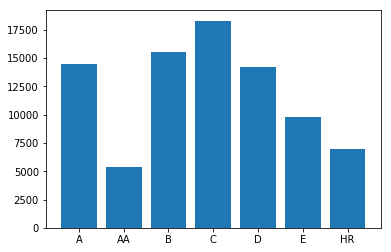

In [19]:
temp = post_july[loans2.ListingCreationDate.dt.date>datetime.date(2009, 7, 31)].ProsperRating
plt.bar(temp.value_counts().index,temp.value_counts())

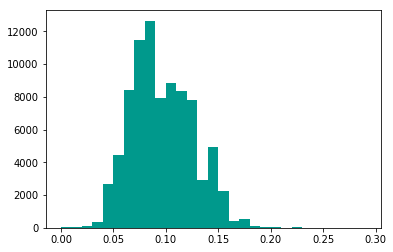

In [20]:
bin_edges=np.arange(0,max(post_july["EstimatedReturn"].dropna())+0.01,0.01)
plt.hist(post_july["EstimatedReturn"].dropna(), bins = bin_edges, color = '#00998c');

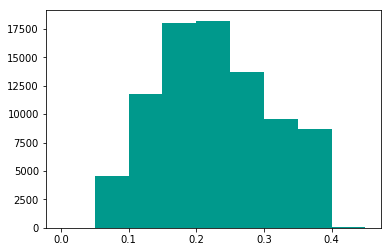

In [21]:
bin_edges=np.arange(0,max(post_july["BorrowerAPR"])+0.05,0.05)
plt.hist(post_july["BorrowerAPR"], bins=bin_edges, color = '#00998c');

### Wealth Distribution

In [37]:
stated_income = post_july[post_july["StatedMonthlyIncome"]!=0]

In [39]:
stated_income["StatedMonthlyIncome"].describe()

count    8.398300e+04
mean     5.982130e+03
std      8.263893e+03
min      8.333300e-02
25%      3.500000e+03
50%      5.000000e+03
75%      7.122167e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [43]:
def classify(row):
    if row["StatedMonthlyIncome"]<2500:
        return 'Low'
    if row["StatedMonthlyIncome"]<8000:
        return 'Medium'
    else:
        return 'High'

In [46]:
stated_income["WageBracket"] = stated_income.apply(classify, axis=1)

C:\Users\Jovan\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<Container object of 3 artists>

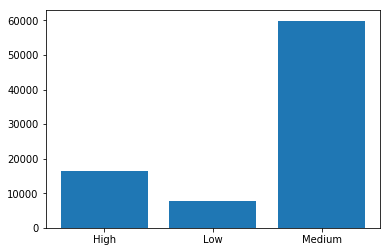

In [50]:
plt.bar(stated_income["WageBracket"].value_counts().index,stated_income["WageBracket"].value_counts())

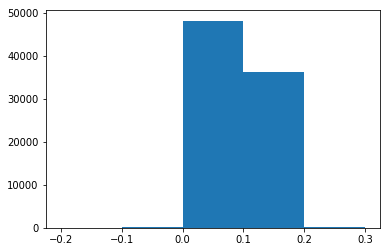

In [25]:
bin_edges=np.arange(-0.2,max(post_july["EstimatedReturn"])+0.1,0.1)
plt.hist(post_july["EstimatedReturn"],bins=bin_edges);

### <font color=#ff0096>Bivariate Exploration</font>

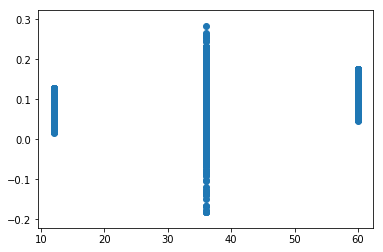

In [55]:
plt.scatter(post_july["Term"],post_july["EstimatedReturn"])

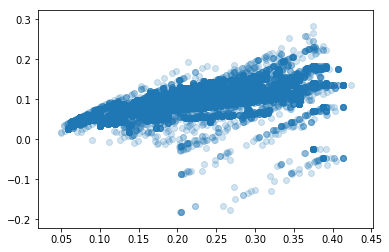

In [27]:
plt.scatter(post_july["BorrowerAPR"],post_july["EstimatedReturn"],alpha=1/5)

In [28]:
np.corrcoef(post_july["BorrowerAPR"],post_july["EstimatedReturn"])[1,0]

0.79512817331498198

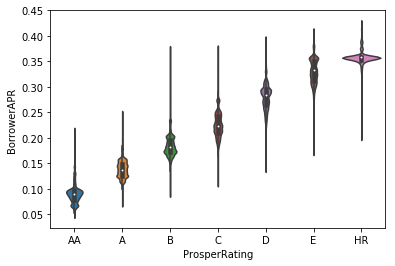

In [29]:
sns.violinplot(data = post_july, x='ProsperRating',y = 'BorrowerAPR', order = ['AA','A','B','C','D','E','HR'])

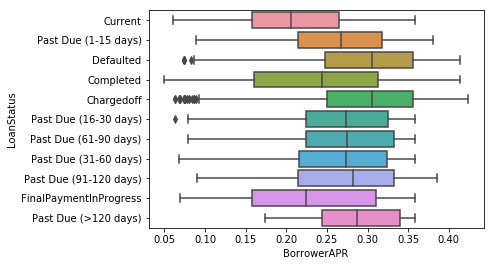

In [30]:
sns.boxplot(data = post_july, y='LoanStatus',x = 'BorrowerAPR')

### <font color=#ff0096>Multivariate Exploration</font>

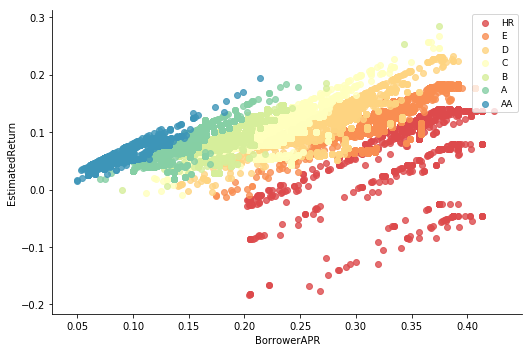

In [31]:
g = sns.FacetGrid(data = post_july, hue = 'ProsperRating', hue_order = ['HR','E','D','C','B','A','AA'], size = 5, aspect = 1.5, palette="Spectral")
g.map(sns.regplot,"BorrowerAPR", "EstimatedReturn", fit_reg = False);
plt.legend(loc=1, fontsize = 9)

In [32]:
finished_loans = post_july[(post_july["LoanStatus"]=="Chargedoff") | (post_july["LoanStatus"]=="Completed") | (post_july["LoanStatus"]=="Defaulted") | (post_july["LoanStatus"]=="Chargedoff") | (post_july["LoanStatus"]=="FinalPaymentInProgresss")]

In [33]:
denom = finished_loans.groupby(['ListingCategory']).size()

In [34]:
lcounts =  finished_loans.groupby(["ListingCategory","LoanStatus"]).size()
lprops = lcounts / denom
lprops = lprops.reset_index(name='count')
lprops = lprops.pivot_table(index='LoanStatus',columns='ListingCategory',values = 'count', fill_value = 0)

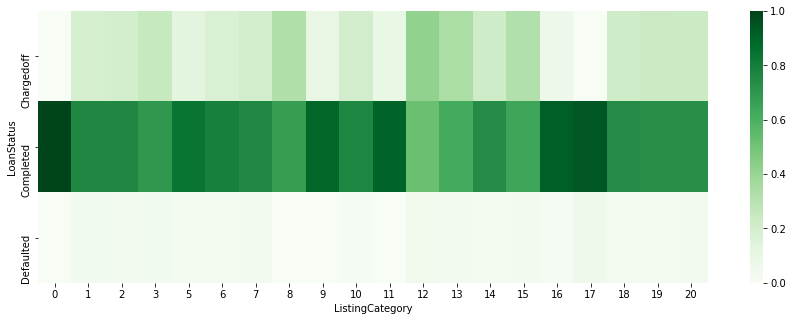

In [79]:
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(lprops, cmap="Greens")

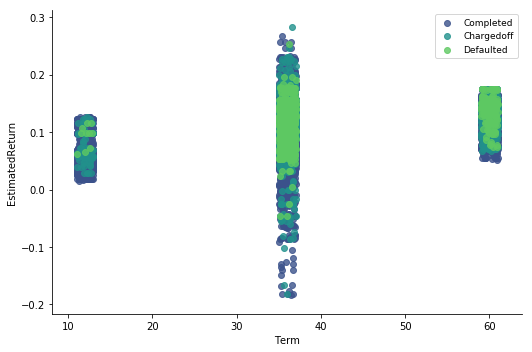

In [81]:
g = sns.FacetGrid(data = post_july, hue = 'LoanStatus', hue_order = ['Completed','Chargedoff','Defaulted'], size = 5, aspect = 1.5, palette="viridis")
g.map(sns.regplot,"Term", "EstimatedReturn", fit_reg = False, x_jitter=True);
plt.legend(loc=1, fontsize = 9)
#plt.scatter(post_july["Term"],post_july["EstimatedReturn"])

## <font color=#b30069> Explantory Analysis </font>

### <font color=#e65f00>What can we expect from prosper?</font>

- The **estimated return** is assigned to the listing at the time it was created and is the difference between the Estimated Effective Yield and the Estimated Loss Rate.

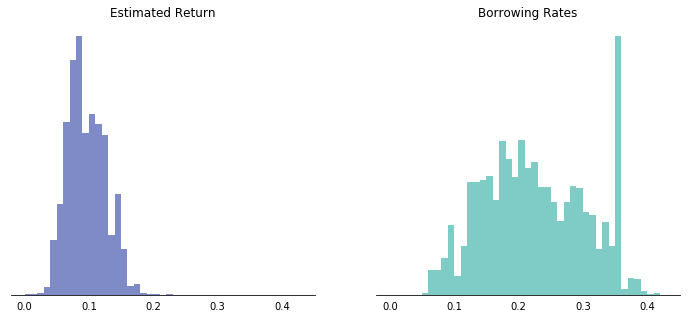

In [111]:
fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

axes = [ax1,ax2]
positions=['right','left','top']
bin_edges1=np.arange(0,max(post_july["BorrowerAPR"].dropna())+0.01,0.01)
ax1.hist(post_july["EstimatedReturn"].dropna(), bins = bin_edges1, color = '#00198e', alpha =0.5);

for ax in axes:
    ax.tick_params(left = 'off', bottom = 'off')
    for pos in positions:
        ax.spines[pos].set_visible(False)
    ax.set_yticklabels('')

ax1.set_title("Estimated Return")
ax2.set_title('Borrowing Rates')

bin_edges2=np.arange(0,max(post_july["BorrowerAPR"])+0.01,0.01)
ax2.hist(post_july["BorrowerAPR"], bins=bin_edges2, color = '#00998c',alpha=0.5);


### <font color=#e65f00>Who Uses Prosper?</font>

Text(0.5,1,'Prosper Ratings')

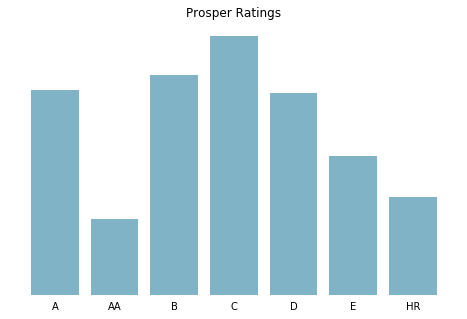

In [238]:
bars= ['HR','E','D','C','B','A','AA']
fig,ax = plt.subplots(figsize=(8,5))
ax.bar(bars,post_july.groupby("ProsperRating").size().reindex(bars), color='#00698c', alpha=0.5)
ax.set
positions=['right','left','top','bottom']
ax.tick_params(left = 'off', bottom = 'off')
for pos in positions:
    ax.spines[pos].set_visible(False)
    ax.set_yticklabels('')
ax.set_title("Prosper Ratings")

In [177]:
post_july.groupby("ProsperRating").size().reindex(bars).index

Index(['HR', 'E', 'D', 'C', 'B', 'A', 'AA'], dtype='object', name='ProsperRating')

### <font color=#e65f00>What Categories are more likely to Default?</font>

Text(0.5,1,'Completion Rate per Category')

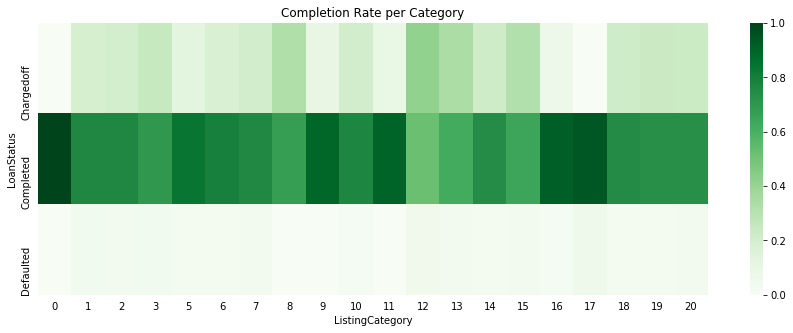

In [184]:
denom = finished_loans.groupby(['ListingCategory']).size()
lcounts =  finished_loans.groupby(["ListingCategory","LoanStatus"]).size()
lprops = lcounts / denom
lprops = lprops.reset_index(name='count')
lprops = lprops.pivot_table(index='LoanStatus',columns='ListingCategory',values = 'count', fill_value = 0)

fig, ax = plt.subplots(figsize=(15,5))

sns.heatmap(lprops, cmap="Greens")

ax.tick_params(left = 'off', bottom = 'off')
ax.set_title("Completion Rate per Category")

### <font color=#e65f00>How does the length of time affect risk?</font>

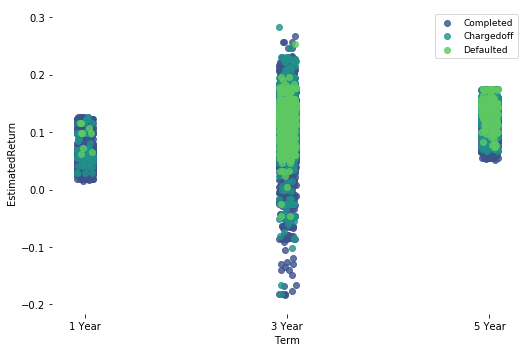

In [232]:
g = sns.FacetGrid(data = post_july, hue = 'LoanStatus', hue_order = ['Completed','Chargedoff','Defaulted'], palette="viridis",size = 5 , aspect = 1.5)
g.map(sns.regplot,"Term", "EstimatedReturn", fit_reg = False, x_jitter=True);
plt.legend(loc=1, fontsize = 9)
g.set(xticks=np.arange(12,84,24),xticklabels=["1 Year", "3 Year", "5 Year" ])
sns.despine(left=True,bottom=True)